In [1]:
import numpy as np
import cv2
import torch
from google.colab.patches import cv2_imshow

In [2]:
# Check if CUDA (GPU) is available
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    !nvidia-smi

CUDA available: True
Wed Nov 27 04:40:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----

In [3]:
# Load YOLOv5 model from PyTorch Hub
yolov5 = torch.hub.load('ultralytics/yolov5', 'yolov5l', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-27 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 89.3M/89.3M [00:00<00:00, 293MB/s]

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients, 109.0 GFLOPs
Adding AutoShape... 


In [4]:
# Download a test image (replace URL for a custom image)
!wget -c 'https://as2.ftcdn.net/v2/jpg/02/61/31/83/1000_F_261318391_vCfeZxtPmq1tCXFbPuuX0GkzutiVJKM5.jpg' -O 'test1.jpg'

--2024-11-27 04:40:55--  https://as2.ftcdn.net/v2/jpg/02/61/31/83/1000_F_261318391_vCfeZxtPmq1tCXFbPuuX0GkzutiVJKM5.jpg
Resolving as2.ftcdn.net (as2.ftcdn.net)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to as2.ftcdn.net (as2.ftcdn.net)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191799 (187K) [image/jpeg]
Saving to: ‘test1.jpg’

test1.jpg           100%[===================>] 187.30K  --.-KB/s    in 0.05s   

2024-11-27 04:40:56 (3.64 MB/s) - ‘test1.jpg’ saved [191799/191799]



In [5]:
# Load the test image
image = cv2.imread('test1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Display the image
from matplotlib import pyplot as plt
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [6]:
# Perform object detection
results = yolov5(image)
objects = results.xyxy[0].detach().cpu().numpy()

# Rescale and annotate objects
h, w, _ = image.shape
classes = yolov5.names  # Class names from the model

for obj in objects:
    confidence = obj[4]  # Confidence score
    if confidence > 0.5:  # Confidence threshold
        class_id = int(obj[5])
        label = f'{classes[class_id]}: {confidence:.2f}'

        # Get bounding box coordinates
        x1, y1, x2, y2 = map(int, obj[:4])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display annotated image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded


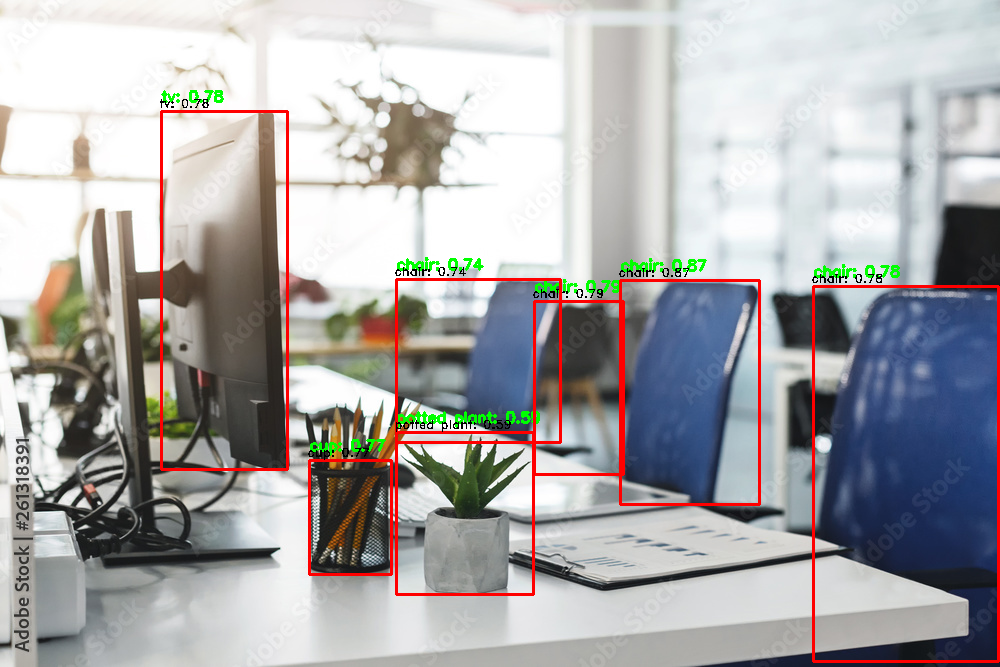

In [7]:
# Show the image with results
classes = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
            'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
            'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
            'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
            'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
            'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
            'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
            'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush' ]
for obj in objects:
    if obj[-2] > 0.5:
        tl, br = obj[0:2].astype('int'), obj[2:4].astype('int')
        cv2.rectangle(image, tuple(tl), tuple(br), (0, 0, 255), 2)
        cv2.putText(image,
                    f'{classes[int(obj[-1])]}: {obj[-2]:.2f}',
                    tuple(tl + (-2, -4)), cv2.FONT_HERSHEY_DUPLEX, 0.4,
                    (0, 0, 0))
cv2_imshow(image)
